In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('cpu_pass_IM.csv')
data['cache'] = data['cache'].str.replace(' MB', '')
data['lithography'] = data['lithography'].str.replace(' nm', '')
data

,name,price,core_count,core_clock,boost_clock,tdp,graphics,smt,codename,socket,lithography,cache,supported_mem,supported_chipset,release_date,pmprice,cpuMark,threadMark,powerPerf,category
0,AMD Ryzen 5 5600X,168.99,6,3.7,4.6,65,NaN,True,Vermeer,Socket AM4,7,32,DDR4,"AMD 300 Series*, AMD 400 Series, AMD 500 Series","Nov 5th, 2020",216.99,22088,3377,339.82,Desktop
1,AMD Ryzen 7 5800X,228.72,8,3.8,4.7,105,NaN,True,Vermeer,Socket AM4,7,32,DDR4,"AMD 300 Series*, AMD 400 Series, AMD 500 Series","Nov 5th, 2020",333.99,28368,3485,270.17,Desktop
2,AMD Ryzen 5 5600,138.00,6,3.5,4.4,65,NaN,True,Vermeer,Socket AM4,7,32,DDR4,"AMD 300 Series*, AMD 400 Series, AMD 500 Series","Apr 20th, 2022",189.99,21350,3208,328.46,Desktop
3,Intel Core i5-12400F,149.97,6,2.5,4.4,65,NaN,True,Alder Lake-S,Socket 1700,10,18,"DDR4, DDR5","Intel 600 Series, Intel 700 Series","Jan 4th, 2022",174.98,19659,3567,302.44,Desktop
4,AMD Ryzen 7 5800X3D,329.99,8,3.4,4.5,105,NaN,True,Vermeer,Socket AM4,7,96,DDR4,"AMD 300 Series*, AMD 400 Series, AMD 500 Series","Apr 20th, 2022",599.00,25508,2850,242.93,Desktop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,Intel Celeron E1500,NaN,2,2.2,2.2,65,NaN,False,Allendale,Socket 775,65,NaN,"DDR1, DDR2, DDR3",NaN,"Nov 30th, 2008",19.65,649,785,9.98,Desktop
572,Intel Core i5-655K,NaN,2,3.2,3.2,73,Intel HD Graphics,True,Clarkdale,Socket 1156,32,4,DDR3,"H55, H57, P55","May 30th, 2010",77.99,2017,1446,27.63,Desktop
573,AMD Phenom II X4 970,NaN,4,3.5,3.5,125,NaN,False,Zosma,Socket AM3,45,6,"DDR2, DDR3","AMD 700 Series, AMD 800 Series, AMD 900 Series...","Oct 1st, 2010",59.88,2644,1412,21.15,Unknown
574,AMD Sempron X2 190,NaN,2,2.5,2.5,45,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.44,879,977,19.53,Unknown


In [3]:
data_cache = data.dropna(subset=['cache'])
data_cache

,name,price,core_count,core_clock,boost_clock,tdp,graphics,smt,codename,socket,lithography,cache,supported_mem,supported_chipset,release_date,pmprice,cpuMark,threadMark,powerPerf,category
0,AMD Ryzen 5 5600X,168.99,6,3.7,4.6,65,NaN,True,Vermeer,Socket AM4,7,32,DDR4,"AMD 300 Series*, AMD 400 Series, AMD 500 Series","Nov 5th, 2020",216.99,22088,3377,339.82,Desktop
1,AMD Ryzen 7 5800X,228.72,8,3.8,4.7,105,NaN,True,Vermeer,Socket AM4,7,32,DDR4,"AMD 300 Series*, AMD 400 Series, AMD 500 Series","Nov 5th, 2020",333.99,28368,3485,270.17,Desktop
2,AMD Ryzen 5 5600,138.00,6,3.5,4.4,65,NaN,True,Vermeer,Socket AM4,7,32,DDR4,"AMD 300 Series*, AMD 400 Series, AMD 500 Series","Apr 20th, 2022",189.99,21350,3208,328.46,Desktop
3,Intel Core i5-12400F,149.97,6,2.5,4.4,65,NaN,True,Alder Lake-S,Socket 1700,10,18,"DDR4, DDR5","Intel 600 Series, Intel 700 Series","Jan 4th, 2022",174.98,19659,3567,302.44,Desktop
4,AMD Ryzen 7 5800X3D,329.99,8,3.4,4.5,105,NaN,True,Vermeer,Socket AM4,7,96,DDR4,"AMD 300 Series*, AMD 400 Series, AMD 500 Series","Apr 20th, 2022",599.00,25508,2850,242.93,Desktop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,AMD Phenom II X4 805,NaN,4,2.5,2.5,95,NaN,False,Deneb,Socket AM3,45,4,DDR3,"AMD 700 Series, AMD 800 Series, AMD 900 Series...","Feb 9th, 2009",173.99,1844,999,19.42,Desktop
564,AMD Phenom II X4 910,NaN,4,2.6,2.6,95,NaN,False,Deneb,Socket AM3,45,6,DDR3,"AMD 700 Series, AMD 800 Series, AMD 900 Series...","Feb 9th, 2009",100.00,1776,988,18.70,Desktop
570,AMD Phenom II X4 905e,NaN,4,2.5,2.5,65,NaN,False,Deneb,Socket AM3,45,6,DDR3,"AMD 700 Series, AMD 800 Series, AMD 900 Series...","Jun 2nd, 2009",53.99,1895,1029,29.16,Desktop
572,Intel Core i5-655K,NaN,2,3.2,3.2,73,Intel HD Graphics,True,Clarkdale,Socket 1156,32,4,DDR3,"H55, H57, P55","May 30th, 2010",77.99,2017,1446,27.63,Desktop


In [4]:
#CSV file has columns 'X' and 'y' for features and target
X = data_cache[['core_count', 'boost_clock', 'tdp', 'smt', 'lithography']]
y = data_cache['cpuMark']

#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#Create and train model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 2538956.2526881723
R² Score: 0.9677902410926218


In [6]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42, alpha=0.2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 1974790.7858721127
R² Score: 0.9749473686133399


In [15]:
# from sklearn.isotonic import IsotonicRegression

# model = IsotonicRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")

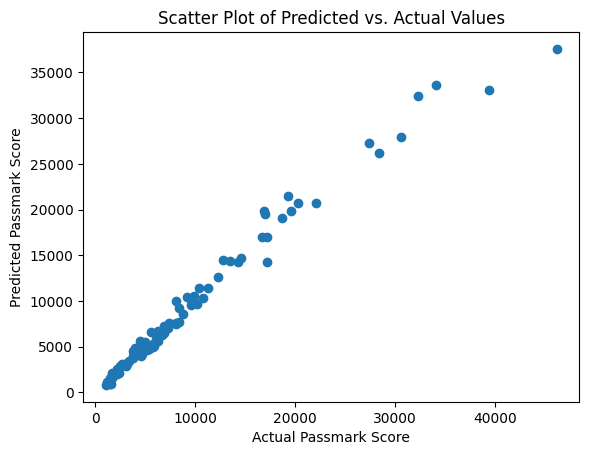

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Passmark Score")
plt.ylabel("Predicted Passmark Score")
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.show()

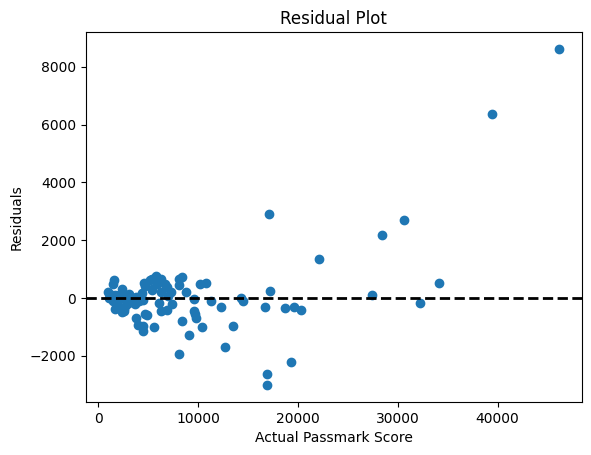

In [17]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel("Actual Passmark Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

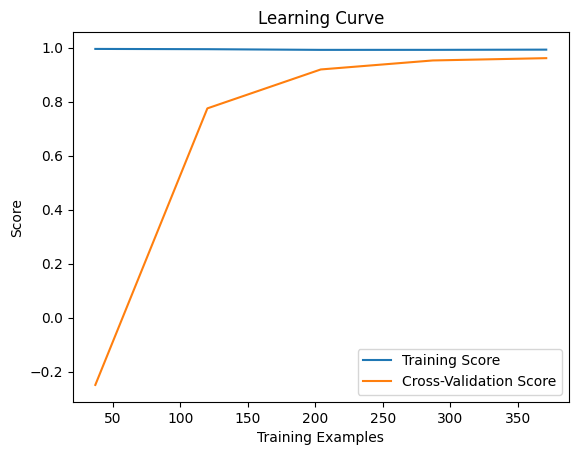

In [18]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [19]:
import pickle

def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

save_model(model, 'PDpassmark.pkl')